In [156]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.feature_selection import SelectKBest, f_classif

# Load data
data = pd.read_csv('/content/Telco-Customer-Churn.csv')

# Splitting data into features and target
X = data.drop('Churn', axis=1)
y = data['Churn']


# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identifying numeric and categorical columns
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object', 'category']).columns

# Numeric Transformer
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

# Categorical Transformer
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Column Transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Feature Selection
feature_selection = SelectKBest(score_func=f_classif, k='all')  # Use a suitable value for k

# SMOTE for handling class imbalance
smote = SMOTE(random_state=42)

# Pipeline with preprocessing, feature selection, SMOTE, and model
model = ImbPipeline(steps=[('preprocessor', preprocessor),
                           ('feature_selection', feature_selection),
                           ('smote', smote),
                           ('classifier', RandomForestClassifier(random_state=42))])

# Training the model
model.fit(X_train, y_train)

# Predicting the test set results
y_pred = model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Classification Report: \n{report}')


Accuracy: 0.7789623312011372
Classification Report: 
              precision    recall  f1-score   support

          No       0.84      0.87      0.85      1033
         Yes       0.59      0.53      0.56       374

    accuracy                           0.78      1407
   macro avg       0.72      0.70      0.71      1407
weighted avg       0.77      0.78      0.78      1407



In [161]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score
from sklearn.feature_selection import SelectKBest, f_regression

# Load data
data = pd.read_csv('/content/Ames_Housing_Data.csv')

# Splitting data into features and target
X = data.drop('SalePrice', axis=1)
y = data['SalePrice']

# Identifying numeric and categorical columns
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating a Column Transformer for scaling and encoding
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean',fill_value='missing')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Feature Selection
feature_selection = SelectKBest(score_func=f_regression, k='all')

# Model: RandomForestRegressor
rf_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('feature_selection', feature_selection),
    ('model', RandomForestRegressor(n_estimators=100, random_state=42))])

# Training the RandomForestRegressor
rf_model.fit(X_train, y_train)

# Making predictions with RandomForestRegressor
y_pred_rf = rf_model.predict(X_test)

# Evaluation of RandomForestRegressor
print("RandomForestRegressor Evaluation:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_rf))
print("R^2 Score:", r2_score(y_test, y_pred_rf))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_rf))
print("Explained Variance Score:", explained_variance_score(y_test, y_pred_rf))
print("\n")

RandomForestRegressor Evaluation:
Mean Squared Error: 706439596.0153836
R^2 Score: 0.9118883227012528
Mean Absolute Error: 15801.847901023893
Explained Variance Score: 0.9122223010751732




Accuracy: 0.7789623312011372
Classification Report: 
              precision    recall  f1-score   support

          No       0.84      0.87      0.85      1033
         Yes       0.59      0.53      0.56       374

    accuracy                           0.78      1407
   macro avg       0.72      0.70      0.71      1407
weighted avg       0.77      0.78      0.78      1407

ROC-AUC Score: 0.8142811291549974


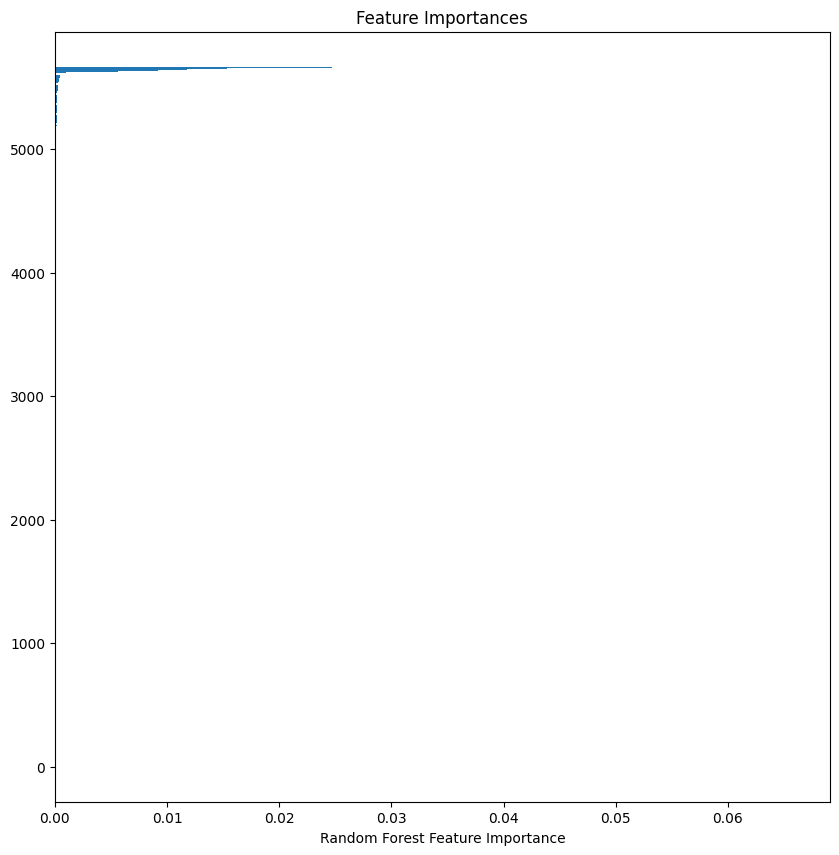

In [165]:
import pandas as pd
! pip install -q shap
import shap
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.feature_selection import SelectKBest, f_classif




# Load data
data = pd.read_csv('/content/Telco-Customer-Churn.csv')

# Splitting data into features and target
X = data.drop('Churn', axis=1)
y = data['Churn']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identifying numeric and categorical columns
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object', 'category']).columns

# Numeric Transformer
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

# Categorical Transformer
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Column Transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Feature Selection
feature_selection = SelectKBest(score_func=f_classif, k='all')  # Use a suitable value for k

# SMOTE for handling class imbalance
smote = SMOTE(random_state=42)

# RandomForestClassifier model
rf_classifier = RandomForestClassifier(random_state=42)

# Pipeline with preprocessing, feature selection, SMOTE, and model
model = ImbPipeline(steps=[('preprocessor', preprocessor),
                           ('feature_selection', feature_selection),
                           ('smote', smote),
                           ('classifier', rf_classifier)])

# Training the model
model.fit(X_train, y_train)

# Predicting the test set results
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]  # Probabilities for ROC-AUC

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

print(f'Accuracy: {accuracy}')
print(f'Classification Report: \n{report}')
print(f'ROC-AUC Score: {roc_auc}')

# Feature Importance
feature_importances = rf_classifier.feature_importances_


# Plotting Feature Importances
feature_importances = rf_classifier.feature_importances_
sorted_idx = feature_importances.argsort()

plt.figure(figsize=(10, 10))
plt.title("Feature Importances")
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align='center')
#plt.yticks(range(len(sorted_idx)), [X_train.columns[i] for i in sorted_idx])
plt.xlabel("Random Forest Feature Importance")
plt.show()



In [167]:
feature_importances[sorted_idx]

array([0.00000000e+00, 0.00000000e+00, 6.56964423e-11, ...,
       5.34925244e-02, 6.56865025e-02, 6.57886897e-02])

In [170]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, roc_auc_score
from tensorflow.keras.callbacks import EarlyStopping

# Load data
data = pd.read_csv('/content/Telco-Customer-Churn.csv')

# Splitting data into features and target
X = data.drop('Churn', axis=1)
y = data['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# Identifying numeric and categorical columns
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Creating a Column Transformer for scaling, encoding, and imputing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ]), numeric_features),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_features)])

# Preprocessing the data
X_processed = preprocessor.fit_transform(X).toarray()

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Model configuration
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# Model training with early stopping
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Predicting on test data
y_pred_probs = model.predict(X_test)
y_pred_binary = np.round(y_pred_probs).ravel()

# Model evaluation
accuracy = model.evaluate(X_test, y_test, verbose=0)[1]
print(f"Test Accuracy: {accuracy}")

# Additional Evaluation Metrics
print("\nAdditional Evaluation Metrics:")
print(classification_report(y_test, y_pred_binary))

# AUC-ROC Score
roc_auc = roc_auc_score(y_test, y_pred_probs)
print(f"AUC-ROC Score: {roc_auc}")

Epoch 1/10
141/141 [==============================] - 5s 24ms/step - loss: 0.5141 - accuracy: 0.7522 - val_loss: 0.4169 - val_accuracy: 0.8089
Epoch 2/10
141/141 [==============================] - 4s 29ms/step - loss: 0.4416 - accuracy: 0.7989 - val_loss: 0.4064 - val_accuracy: 0.8142
Epoch 3/10
141/141 [==============================] - 3s 19ms/step - loss: 0.4221 - accuracy: 0.8064 - val_loss: 0.4038 - val_accuracy: 0.8178
Epoch 4/10
141/141 [==============================] - 2s 17ms/step - loss: 0.4072 - accuracy: 0.8140 - val_loss: 0.3995 - val_accuracy: 0.8142
Epoch 5/10
141/141 [==============================] - 2s 17ms/step - loss: 0.3885 - accuracy: 0.8258 - val_loss: 0.4054 - val_accuracy: 0.8124
Epoch 6/10
141/141 [==============================] - 2s 14ms/step - loss: 0.3600 - accuracy: 0.8467 - val_loss: 0.4020 - val_accuracy: 0.8027
Epoch 7/10
141/141 [==============================] - 1s 9ms/step - loss: 0.3012 - accuracy: 0.8818 - val_loss: 0.3984 - val_accuracy: 0.8018


In [175]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.callbacks import EarlyStopping

# Load data
data = pd.read_csv('/content/Ames_Housing_Data.csv')

# Splitting data into features and target
X = data.drop('SalePrice', axis=1)  # Assuming 'SalePrice' is the target column
y = data['SalePrice']

# Identifying numeric and categorical columns
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object', 'category']).columns

# Creating a Column Transformer for scaling, encoding, and imputing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ]), numeric_features),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_features)])

# Preprocessing the data
X_processed = preprocessor.fit_transform(X).toarray()

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Model configuration for regression
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1,activation='linear')  # Single output node for regression
])

model.compile(optimizer='adam',
              loss='mean_squared_error',  # MSE as the loss function for regression
              metrics=['mean_squared_error'])

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# Model training with early stopping
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Predicting on test data
y_pred = model.predict(X_test)

# Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Test Mean Squared Error: {mse}")
print(f"Test R^2 Score: {r2}")


Epoch 1/100
59/59 [==============================] - 4s 16ms/step - loss: 37740285952.0000 - mean_squared_error: 37740285952.0000 - val_loss: 38197067776.0000 - val_mean_squared_error: 38197067776.0000
Epoch 2/100
59/59 [==============================] - 1s 17ms/step - loss: 37698617344.0000 - mean_squared_error: 37698617344.0000 - val_loss: 38106595328.0000 - val_mean_squared_error: 38106595328.0000
Epoch 3/100
59/59 [==============================] - 1s 13ms/step - loss: 37515825152.0000 - mean_squared_error: 37515825152.0000 - val_loss: 37798649856.0000 - val_mean_squared_error: 37798649856.0000
Epoch 4/100
59/59 [==============================] - 1s 12ms/step - loss: 37036593152.0000 - mean_squared_error: 37036593152.0000 - val_loss: 37111382016.0000 - val_mean_squared_error: 37111382016.0000
Epoch 5/100
59/59 [==============================] - 1s 10ms/step - loss: 36134940672.0000 - mean_squared_error: 36134940672.0000 - val_loss: 35915001856.0000 - val_mean_squared_error: 3591500

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-9-d3bbf1f533c2>:55: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(data.groupby('Cluster').mean())


         SeniorCitizen     tenure  MonthlyCharges  TotalCharges
Cluster                                                        
0             0.199657  56.933018       89.153736   5066.714470
1             0.034211  30.667763       21.076283    665.220329
2             0.196356  15.324537       67.856111   1019.370342


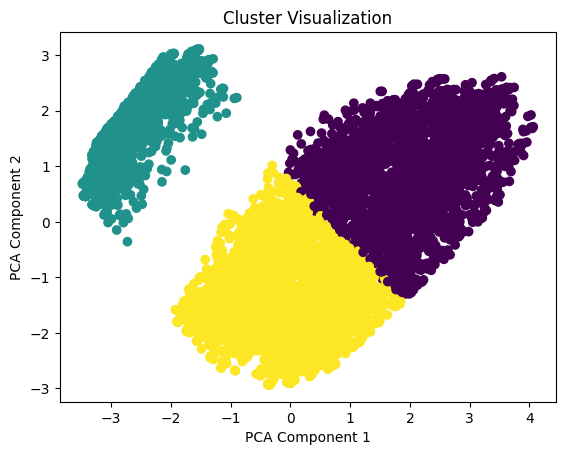

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA

# Load data
data = pd.read_csv('/content/Telco-Customer-Churn.csv')

# Drop target column for unsupervised learning
X = data.drop('Churn', axis=1)

# Identifying numeric and categorical columns
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Creating a Column Transformer for scaling and encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ]), numeric_features),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_features)])

# Preprocessing the data
X_processed = preprocessor.fit_transform(X).toarray()

# KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_processed)

# Adding cluster information to the original data
data['Cluster'] = clusters

# Analyzing the Clusters
print(data.groupby('Cluster').mean())

# If needed, visualize the clusters (assuming 2D data, which needs dimensionality reduction if more than 2 features)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_processed)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Cluster Visualization')
plt.show()


In [10]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(X_processed, clusters)
print("Silhouette Score: ", silhouette_avg)


Silhouette Score:  0.21761743843045156


In [5]:
# Assuming 'clusters' is the array of cluster labels obtained from KMeans
data['Cluster'] = clusters


In [6]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Cluster
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,2
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,2
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,2
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,2
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,2


In [8]:
data.groupby('Cluster').mean()

<ipython-input-8-ffdcb56e2694>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby('Cluster').mean()


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
Cluster,,,,
0,0.199657,56.933018,89.153736,5066.714470
1,0.034211,30.667763,21.076283,665.220329
2,0.196356,15.324537,67.856111,1019.370342


In [12]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.callbacks import EarlyStopping

In [13]:
data = pd.read_csv('/content/l2_data.csv')
data.head()

,physician_id,physician_efficiency,metro_area,physician_working_specialty,physician_gender,physician_credential,physician_med_school,physician_graduation_year,bump_feature,engineered_feature_1,engineered_feature_2,engineered_feature_3,medicare_engineered_1,medicare_engineered_2,medicare_engineered_3,medicare_enginerred_4,medicare_engineered_5,medicare_engineered_6,num_medicare_patients,medicare_patient_hcc_risk_score
0,866,0.10,Chicago,Nephrology,M,UNKNOWN,OTHER,2008.0,12,1.004,1.361,9.7,3.25,3,5,2,1,5,228,5.328
1,4766,0.12,Chicago,Hospital Based Physician,M,UNKNOWN,OTHER,1982.0,15,0.662,0.901,6.0,4.00,4,2,5,5,4,372,2.057
2,7088,0.12,Chicago,Nephrology,F,UNKNOWN,OTHER,2004.0,16,0.227,1.148,0.4,2.75,3,1,4,2,4,339,5.472
3,2808,0.12,Chicago,Nephrology,F,UNKNOWN,"LOYOLA UNIVERSITY OF CHICAGO, STRITCH SCHOOL O...",2013.0,14,0.135,1.060,1.4,4.00,4,3,4,4,5,358,6.300
4,4040,0.13,Dallas,Nephrology,F,UNKNOWN,OTHER,1979.0,17,1.096,1.100,3.3,3.00,3,1,5,4,2,219,3.445


In [20]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.callbacks import EarlyStopping

# Assuming 'data' is your DataFrame
# Splitting data into features and target
X = data.drop('medicare_patient_hcc_risk_score', axis=1)
y = data['medicare_patient_hcc_risk_score']

# Identifying numeric and categorical columns
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object', 'category']).columns

# Creating a Column Transformer for scaling, encoding, and imputing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ]), numeric_features),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_features)])

# Feature Selection
feature_selection = SelectKBest(score_func=f_regression, k='all') # Adjust 'k' as needed

# Combining preprocessing and feature selection in a pipeline
full_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('feature_selection', feature_selection)
])

# Preprocessing and feature selection
X_processed = full_pipeline.fit_transform(X,y).toarray()

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Model configuration
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# Model training with early stopping
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Predicting on test data
y_pred_probs = model.predict(X_test)
y_pred_binary = np.round(y_pred_probs).ravel()

# Model evaluation
accuracy = model.evaluate(X_test, y_test, verbose=0)[1]
print(f"Test Accuracy: {accuracy}")

# Additional Evaluation Metrics
print("\nAdditional Evaluation Metrics:")
print(classification_report(y_test, y_pred_binary))

# AUC-ROC Score
roc_auc = roc_auc_score(y_test, y_pred_probs)
print(f"AUC-ROC Score: {roc_auc}")
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Learning Curve')
plt.legend()
plt.show()

# Predicting on test data
y_pred = model.predict(X_test)

# Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Test Mean Squared Error: {mse}")
print(f"Test R^2 Score: {r2}")

from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print(f"Test Mean Absolute Error: {mae}")


from sklearn.metrics import explained_variance_score

explained_variance = explained_variance_score(y_test, y_pred)
print(f"Explained Variance Score: {explained_variance}")

from sklearn.metrics import median_absolute_error

median_ae = median_absolute_error(y_test, y_pred)
print(f"Median Absolute Error: {median_ae}")


import matplotlib.pyplot as plt

residuals = y_test - y_pred.ravel()
plt.scatter(y_test, residuals)
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max(), colors='red')
plt.xlabel('Observed Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()



KeyError: ignored

Epoch 1/10
141/141 [==============================] - 43s 14ms/step - loss: 0.4836 - accuracy: 0.7711 - val_loss: 0.4251 - val_accuracy: 0.7884
Epoch 2/10
141/141 [==============================] - 2s 16ms/step - loss: 0.4156 - accuracy: 0.8051 - val_loss: 0.4233 - val_accuracy: 0.8009
Epoch 3/10
141/141 [==============================] - 3s 18ms/step - loss: 0.3769 - accuracy: 0.8291 - val_loss: 0.4243 - val_accuracy: 0.7956
Epoch 4/10
141/141 [==============================] - 1s 10ms/step - loss: 0.2752 - accuracy: 0.8947 - val_loss: 0.4407 - val_accuracy: 0.7724
Epoch 5/10
44/44 [==============================] - 0s 4ms/step
Test Accuracy: 0.7498223185539246

Additional Evaluation Metrics:
              precision    recall  f1-score   support

           0       0.89      0.75      0.81      1033
           1       0.52      0.75      0.62       374

    accuracy                           0.75      1407
   macro avg       0.71      0.75      0.72      1407
weighted avg       0.79  

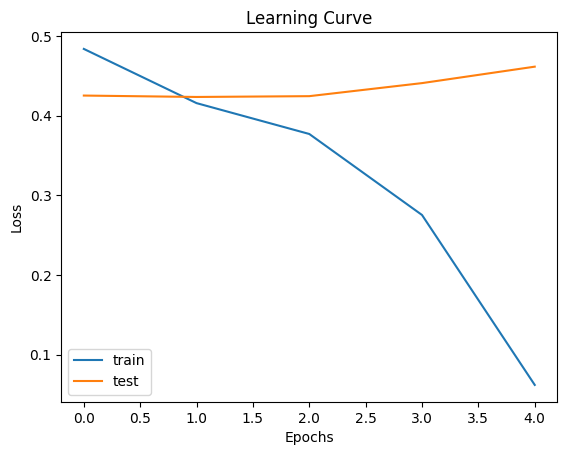

In [29]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression,f_classif
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.callbacks import EarlyStopping

# Assuming 'data' is your DataFrame
# Splitting data into features and target
data = pd.read_csv('/content/Telco-Customer-Churn.csv')

data['Churn'] = np.where(data['Churn'] == 'Yes', 1, 0)

X = data.drop('Churn', axis=1)
y = data['Churn']

# Identifying numeric and categorical columns
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object', 'category']).columns

# Creating a Column Transformer for scaling, encoding, and imputing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ]), numeric_features),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_features)])

# Feature Selection
feature_selection = SelectKBest(score_func=f_classif, k='all') # Adjust 'k' as needed

# Combining preprocessing and feature selection in a pipeline
full_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('feature_selection', feature_selection)
])

# Preprocessing and feature selection
X_processed = full_pipeline.fit_transform(X,y).toarray()

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)



# Update input_shape in model based on the number of selected features
input_shape = X_train.shape[1]

# Model configuration
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# Model training with early stopping
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Predicting on test data
y_pred_probs = model.predict(X_test)
y_pred_binary = np.round(y_pred_probs).ravel()

# Model evaluation
accuracy = model.evaluate(X_test, y_test, verbose=0)[1]
print(f"Test Accuracy: {accuracy}")

# Additional Evaluation Metrics
print("\nAdditional Evaluation Metrics:")
print(classification_report(y_test, y_pred_binary))

# AUC-ROC Score
roc_auc = roc_auc_score(y_test, y_pred_probs)
print(f"AUC-ROC Score: {roc_auc}")
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Learning Curve')
plt.legend()
plt.show()



In [30]:
# Predicting on test data
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)  # Converting probabilities to binary predictions

# Assuming y_test is binary (0s and 1s)
from sklearn.metrics import roc_auc_score

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_pred)
print(f'ROC-AUC Score: {roc_auc}')


44/44 [==============================] - 0s 4ms/step
ROC-AUC Score: 0.7511583001589265


In [24]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.feature_selection import SelectKBest, f_classif

# Load data
data = pd.read_csv('/content/Telco-Customer-Churn.csv')

# Convert 'Churn' column to binary
data['Churn'] = np.where(data['Churn'] == 'Yes', 1, 0)

# Splitting data into features and target
X = data.drop('Churn', axis=1)
y = data['Churn']

# Identifying numeric and categorical columns
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object', 'category']).columns

# Numeric Transformer
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

# Categorical Transformer
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Column Transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Feature Selection
feature_selection = SelectKBest(score_func=f_classif, k='all')  # Use a suitable value for k

# SMOTE for handling class imbalance
smote = SMOTE(random_state=42)

# RandomForestClassifier model
rf_classifier = RandomForestClassifier(random_state=42)

# Pipeline with preprocessing, feature selection, SMOTE, and model
model = ImbPipeline(steps=[('preprocessor', preprocessor),
                           ('feature_selection', feature_selection),
                           ('smote', smote),
                           ('classifier', rf_classifier)])

# Perform cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='roc_auc')
print("Cross-Validated ROC-AUC Scores:", cv_scores)
print("Mean ROC-AUC Score:", cv_scores.mean())

# Splitting the data into training and testing sets for model evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the model on the full training set
model.fit(X_train, y_train)

# Predicting the test set results
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]  # Probabilities for ROC-AUC

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

print(f'\nAccuracy: {accuracy}')
print(f'Classification Report: \n{report}')
print(f'ROC-AUC Score: {roc_auc}')



Cross-Validated ROC-AUC Scores: [0.83940912 0.84221234 0.81175628 0.81607284 0.82183497]
Mean ROC-AUC Score: 0.8262571098950178

Accuracy: 0.7789623312011372
Classification Report: 
              precision    recall  f1-score   support

           0       0.84      0.87      0.85      1033
           1       0.59      0.53      0.56       374

    accuracy                           0.78      1407
   macro avg       0.72      0.70      0.71      1407
weighted avg       0.77      0.78      0.78      1407

ROC-AUC Score: 0.8142811291549974
